## CROP BBOXES

In [ ]:
# Code adapted from Tensorflow Object Detection Framework
# https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb
# Tensorflow Object Detection Detector

import numpy as np
import tensorflow as tf
import time
import cv2
import os


class DetectorAPI:
    def __init__(self, path_to_ckpt):
        self.path_to_ckpt = path_to_ckpt

        self.detection_graph = tf.Graph()
        with self.detection_graph.as_default():
            od_graph_def = tf.compat.v1.GraphDef()
            with tf.compat.v2.io.gfile.GFile(self.path_to_ckpt, 'rb') as fid:
                serialized_graph = fid.read()
                od_graph_def.ParseFromString(serialized_graph)
                tf.import_graph_def(od_graph_def, name='')

        self.default_graph = self.detection_graph.as_default()
        self.sess = tf.compat.v1.Session(graph=self.detection_graph)

        # Definite input and output Tensors for detection_graph
        self.image_tensor = self.detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        self.detection_boxes = self.detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        self.detection_scores = self.detection_graph.get_tensor_by_name('detection_scores:0')
        self.detection_classes = self.detection_graph.get_tensor_by_name('detection_classes:0')
        self.num_detections = self.detection_graph.get_tensor_by_name('num_detections:0')

    def processFrame(self, image):
        # Expand dimensions since the trained_model expects images to have shape: [1, None, None, 3]
        image_np_expanded = np.expand_dims(image, axis=0)
        # Actual detection.
        
        (boxes, scores, classes, num) = self.sess.run(
            [self.detection_boxes, self.detection_scores, self.detection_classes, self.num_detections],
            feed_dict={self.image_tensor: image_np_expanded})

        im_height, im_width,_ = image.shape
        boxes_list = [None for i in range(boxes.shape[1])]
        for i in range(boxes.shape[1]):
            boxes_list[i] = (int(boxes[0,i,0] * im_height),
                        int(boxes[0,i,1]*im_width),
                        int(boxes[0,i,2] * im_height),
                        int(boxes[0,i,3]*im_width))

        return boxes_list, scores[0].tolist(), [int(x) for x in classes[0].tolist()], int(num[0])

    def close(self):
        self.sess.close()
        self.default_graph.close()

u,d,l,r = [],[],[],[]
start_time = time.time()
        
if __name__ == "__main__":
    model_path = r'ssd_inception_v2_coco_11_06_2017\ssd_inception_v2_coco_11_06_2017\frozen_inference_graph.pb'
    odapi = DetectorAPI(path_to_ckpt=model_path)
    threshold = 0.15
    total = []
    # cap = cv2.VideoCapture(0)
    
    os.makedirs('Examples5', exist_ok=True)
 
    for x in os.listdir('Examples'):
        
        img = cv2.imread('Examples/'+x)
        # img = cv2.resize(img, (1280, 720))

        boxes, scores, classes, num = odapi.processFrame(img)
        

        # Visualization of the results of a detection.

        for i in range(len(boxes)):
            # Class 1 represents human
            if classes[i] == 1 and scores[i] > threshold:
                
                total.append(boxes[i])
                box = boxes[i]
                
                
#                 # print(len(box))
#                 # if len(box) == 0:
#                     # print(x)
#                     # print(box)
#                 cv2.rectangle(img,(box[1],box[0]),(box[3],box[2]),(255,0,0),2)
#         print(x)
#         print(total)
        
        for i in range(len(total)):
            u.append(total[i][0])
            d.append(total[i][1])
            l.append(total[i][2])
            r.append(total[i][3])
        
        
        
        
#         print(min(u), max(l), min(d), max(r))
        if len(u) or len(l) or len(d) or len(r) != 0:
            cv2.imwrite('Examples5/'+x,img[min(u): max(l), min(d):max(r)])
        
        total,u,d,l,r = [],[],[],[],[]
            

#         cv2.imwrite('try2/'+x, img)
        # key = cv2.waitKey(1)
        # if key & 0xFF == ord('q'):
        #     break
end_time = time.time()

print("Elapsed Time:", end_time-start_time)

# 8 minutes

## COLLAGING

In [71]:
from PIL import Image, ImageDraw
import numpy as np
import random
import os

def normalize_image_size(image_path, size):
    # Load image from file
    image = Image.open(image_path)
    
    # Calculate new size while maintaining aspect ratio
    width, height = image.size
    if width > height:
        new_width = size
        new_height = int(height * size / width)
    else:
        new_height = size
        new_width = int(width * size / height)
    
    # Resize image
    resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)
    
    return resized_image



# Load the images to be used in the collage
images, img_size = [],[]

for i in os.listdir('Examples5'):
    img = Image.open('Examples5/'+i)
    img_size.append(img.size)
    
size = max(min(img_size))

# Define the shapes to use in the collage
# shapes = [
#     ((0, 0), (500, 500)),
#     ((500, 0), (1000, 500)),
#     ((0, 500), (500, 1000)),
#     ((500, 500), (1000, 1000))
# ]
# s, t, u, v, w, x, y, z = 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000
s, t, u, v, w, x, y, z = size, size*2, size*3, size*4, size*5, size*6, size*7, size*8
shapes = [
    ((0, 0), (s, s)), ((s, 0), (t, s)), ((t, 0), (u, s)), ((u, 0), (v, s)), ((v, 0), (w, s)), ((w, 0), (x, s)), ((x, 0), (y, s)), ((y, 0), (z, s)),
    ((0, s), (s, t)), ((s, s), (t, t)), ((t, s), (u, t)), ((u, s), (v, t)), ((v, s), (w, t)), ((w, s), (x, t)), ((x, s), (y, t)), ((y, s), (z, t)),
    ((0, t), (s, u)), ((s, t), (t, u)), ((t, t), (u, u)), ((u, t), (v, u)), ((v, t), (w, u)), ((w, t), (x, u)), ((x, t), (y, u)), ((y, t), (z, u)),
    ((0, u), (s, v)), ((s, u), (t, v)), ((t, u), (u, v)), ((u, u), (v, v)), ((v, u), (w, v)), ((w, u), (x, v)), ((x, u), (y, v)), ((y, u), (z, v)),
    ((0, v), (s, w)), ((s, v), (t, w)), ((t, v), (u, w)), ((u, v), (v, w)), ((v, v), (w, w)), ((w, v), (x, w)), ((x, v), (y, w)), ((y, v), (z, w)),
    ((0, w), (s, x)), ((s, w), (t, x)), ((t, w), (u, x)), ((u, w), (v, x)), ((v, w), (w, x)), ((w, w), (x, x)), ((x, w), (y, x)), ((y, w), (z, x)),
    ((0, x), (s, y)), ((s, x), (t, y)), ((t, x), (u, y)), ((u, x), (v, y)), ((v, x), (w, y)), ((w, x), (x, y)), ((x, x), (y, y)), ((y, x), (z, y)),
    ((0, y), (s, z)), ((s, y), (t, z)), ((t, y), (u, z)), ((u, y), (v, z)), ((v, y), (w, z)), ((w, y), (x, z)), ((x, y), (y, z)), ((y, y), (z, z)),
]

# Shuffle the shapes to add some randomness to the collage
# random.shuffle(shapes)

# Define the dimensions of the final collage
canvas_width = size*9
canvas_height = size*9

# Create a new image to use as the canvas
canvas = Image.new('RGB', (canvas_width, canvas_height), (255, 255, 255))

# heart = [0,1,1,0,0,1,1,0,
#          0,1,1,0,0,1,1,0,
#          1,1,1,1,1,1,1,1,
#          1,1,1,1,1,1,1,1,
#          0,1,1,1,1,1,1,0,
#          0,0,1,1,1,1,0,0,
#          0,0,0,1,1,1,0,0,
#          0,0,0,0,1,0,0,0
#         ]
# circle = [0,0,0,1,1,0,0,0,
#           0,0,1,1,1,1,0,0,
#           0,1,1,1,1,1,1,0,
#           1,1,1,1,1,1,1,1,
#           1,1,1,1,1,1,1,1,
#           0,1,1,1,1,1,1,0,
#           0,0,1,1,1,1,0,0,
#           0,0,0,1,1,0,0,0
#          ]
# pentagon = [0,0,0,1,0,0,0,0,
#             0,0,1,1,1,1,0,0,
#             0,1,1,1,1,1,1,0,
#             1,1,1,1,1,1,1,1,
#             0,1,1,1,1,1,1,0,
#             0,0,1,1,1,1,1,0,
#             0,0,1,1,1,1,0,0,
#             0,0,1,1,1,1,0,0
#            ]
# square = [all 1,1,1]
rectangle = [0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,
             0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,
            ]

for i in os.listdir('Examples5'):
    img = normalize_image_size('Examples5/'+i, size)
    images.append(img)

# Paste the images onto the canvas
j = 0
for i in range(len(shapes)):
    if rectangle[i] == 1:
        canvas.paste(images[j], shapes[i][0])
        j+=1
    else:
        i+=1

# Save the collage
canvas.save('rectangle.jpg')

C:\Users\Dell\AppData\Local\Temp\ipykernel_6336\3181885035.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)


In [47]:
import math


def higher_square(num):
    root = int(math.sqrt(num))
    return (root + 1) #** 2

tuples_lst = []

# for appending all matrix 
var = [0]

# Size of images
siz = 68

# square of (higher square root of (number of images))
length = higher_square(151)

for i in range(length):
    i+=1
    var.append(siz*i)


# matrix places
var

[0, 68, 136, 204, 272, 340, 408, 476, 544, 612, 680, 748, 816, 884]

In [15]:
var = [0, 68, 136, 204, 272, 340, 408, 476, 544, 612, 680, 748, 816, 884]
result = []
final = []

# Loop through each pair of items in the list
for i in range(len(var)):
    for j in range(len(var)):
        
        # Create a tuple of the pair of items and append it to the result list
        result.append((var[i], var[j]))

result.remove((var[0],var[-1]))
result.remove((var[-1],var[0]))
# print(result)

x1,y1,x2,y2 = 0,0,1,1

    
for w in range(length**2):
    
    # if the loop reaches the divisible number of length
    if x1%length==0 and x1!=0:
        x1 = 0
        x2 = 1
        y1+=1
        y2+=1
        
    final.append(((var[x1],var[y1]),(var[x2],var[y2])))
    x1+=1
    x2+=1
    
final

[((0, 0), (68, 68)),
 ((68, 0), (136, 68)),
 ((136, 0), (204, 68)),
 ((204, 0), (272, 68)),
 ((272, 0), (340, 68)),
 ((340, 0), (408, 68)),
 ((408, 0), (476, 68)),
 ((476, 0), (544, 68)),
 ((544, 0), (612, 68)),
 ((612, 0), (680, 68)),
 ((680, 0), (748, 68)),
 ((748, 0), (816, 68)),
 ((816, 0), (884, 68)),
 ((0, 68), (68, 136)),
 ((68, 68), (136, 136)),
 ((136, 68), (204, 136)),
 ((204, 68), (272, 136)),
 ((272, 68), (340, 136)),
 ((340, 68), (408, 136)),
 ((408, 68), (476, 136)),
 ((476, 68), (544, 136)),
 ((544, 68), (612, 136)),
 ((612, 68), (680, 136)),
 ((680, 68), (748, 136)),
 ((748, 68), (816, 136)),
 ((816, 68), (884, 136)),
 ((0, 136), (68, 204)),
 ((68, 136), (136, 204)),
 ((136, 136), (204, 204)),
 ((204, 136), (272, 204)),
 ((272, 136), (340, 204)),
 ((340, 136), (408, 204)),
 ((408, 136), (476, 204)),
 ((476, 136), (544, 204)),
 ((544, 136), (612, 204)),
 ((612, 136), (680, 204)),
 ((680, 136), (748, 204)),
 ((748, 136), (816, 204)),
 ((816, 136), (884, 204)),
 ((0, 204),

In [27]:
a = [(0, 0), (0, 68), (0, 136), (0, 204), (0, 272), (0, 340), (0, 408), (0, 476), (0, 544), (0, 612), (0, 680), (0, 748), (0, 816), (0, 884), (68, 0), (68, 68), (68, 136), (68, 204), (68, 272), (68, 340), (68, 408), (68, 476), (68, 544), (68, 612), (68, 680), (68, 748), (68, 816), (68, 884)]

a.remove((var[0],var[1]))
a.remove((var[0],var[0]))
a

[(0, 136),
 (0, 204),
 (0, 272),
 (0, 340),
 (0, 408),
 (0, 476),
 (0, 544),
 (0, 612),
 (0, 680),
 (0, 748),
 (0, 816),
 (0, 884),
 (68, 0),
 (68, 68),
 (68, 136),
 (68, 204),
 (68, 272),
 (68, 340),
 (68, 408),
 (68, 476),
 (68, 544),
 (68, 612),
 (68, 680),
 (68, 748),
 (68, 816),
 (68, 884)]

In [30]:
len(result)

194

In [16]:
for i in range(0, len(result)):    
    for j in range(i+1, len(result)):    
        if(result[i] == result[j]):    
            print(result[j])  

In [2]:
(13*13)/2

84.5

In [4]:
size = 1
s, t, u, v, w, x, y, z = size, size*2, size*3, size*4, size*5, size*6, size*7, size*8
shapes = [
    ((0, 0), (s, s)), ((s, 0), (t, s)), ((t, 0), (u, s)), ((u, 0), (v, s)), ((v, 0), (w, s)), ((w, 0), (x, s)), ((x, 0), (y, s)), ((y, 0), (z, s)),
    ((0, s), (s, t)), ((s, s), (t, t)), ((t, s), (u, t)), ((u, s), (v, t)), ((v, s), (w, t)), ((w, s), (x, t)), ((x, s), (y, t)), ((y, s), (z, t)),
    ((0, t), (s, u)), ((s, t), (t, u)), ((t, t), (u, u)), ((u, t), (v, u)), ((v, t), (w, u)), ((w, t), (x, u)), ((x, t), (y, u)), ((y, t), (z, u)),
    ((0, u), (s, v)), ((s, u), (t, v)), ((t, u), (u, v)), ((u, u), (v, v)), ((v, u), (w, v)), ((w, u), (x, v)), ((x, u), (y, v)), ((y, u), (z, v)),
    ((0, v), (s, w)), ((s, v), (t, w)), ((t, v), (u, w)), ((u, v), (v, w)), ((v, v), (w, w)), ((w, v), (x, w)), ((x, v), (y, w)), ((y, v), (z, w)),
    ((0, w), (s, x)), ((s, w), (t, x)), ((t, w), (u, x)), ((u, w), (v, x)), ((v, w), (w, x)), ((w, w), (x, x)), ((x, w), (y, x)), ((y, w), (z, x)),
    ((0, x), (s, y)), ((s, x), (t, y)), ((t, x), (u, y)), ((u, x), (v, y)), ((v, x), (w, y)), ((w, x), (x, y)), ((x, x), (y, y)), ((y, x), (z, y)),
    ((0, y), (s, z)), ((s, y), (t, z)), ((t, y), (u, z)), ((u, y), (v, z)), ((v, y), (w, z)), ((w, y), (x, z)), ((x, y), (y, z)), ((y, y), (z, z)),
]
len(shapes)

64

In [11]:
e = int(input())
if e%13==0:
    print(True)

1


## Resize shape

In [60]:
from PIL import Image
import numpy as np
im = Image.open('icon/vertical.png')
width, height = im.size   # Get dimensions

if width > height:
    # Take difference, split it into two
    ext = (width-height)//2
    left = ext
    top = 0
    right = height+ext
    bottom = height

    # Crop the center of the image
    im = im.crop((left,top, right, bottom)) #(38, 0, 537+38, 537)

if width < height:
    # Take difference, split it into two
    ext = (height-width)//2
    top = ext
    left = 0
    bottom = width+ext
    right = width

    # Crop the center of the image
    im = im.crop((left,top, right, bottom))

# Resize
im = im.resize((13,13))
# Grayscale
im = im.convert('L')
# Threshold
im = im.point( lambda p: 255 if p > 100 else 0 )
im = np.array(im)
# iterate through the sublist using List comprehension
flatList = [element for innerList in im for element in innerList]
flatList

[255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 0,
 0,
 0,
 0,
 0,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255]

In [42]:
print(min(width,height))
print(height)

537
537


In [12]:
(max(width,height)-min(width,height))//2

38

In [45]:
print(left,top, right, bottom)

0 39 182 221


In [23]:
(max(width,height)-min(width,height))

77

C:\Users\Dell\AppData\Local\Temp\ipykernel_10000\2923220468.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)


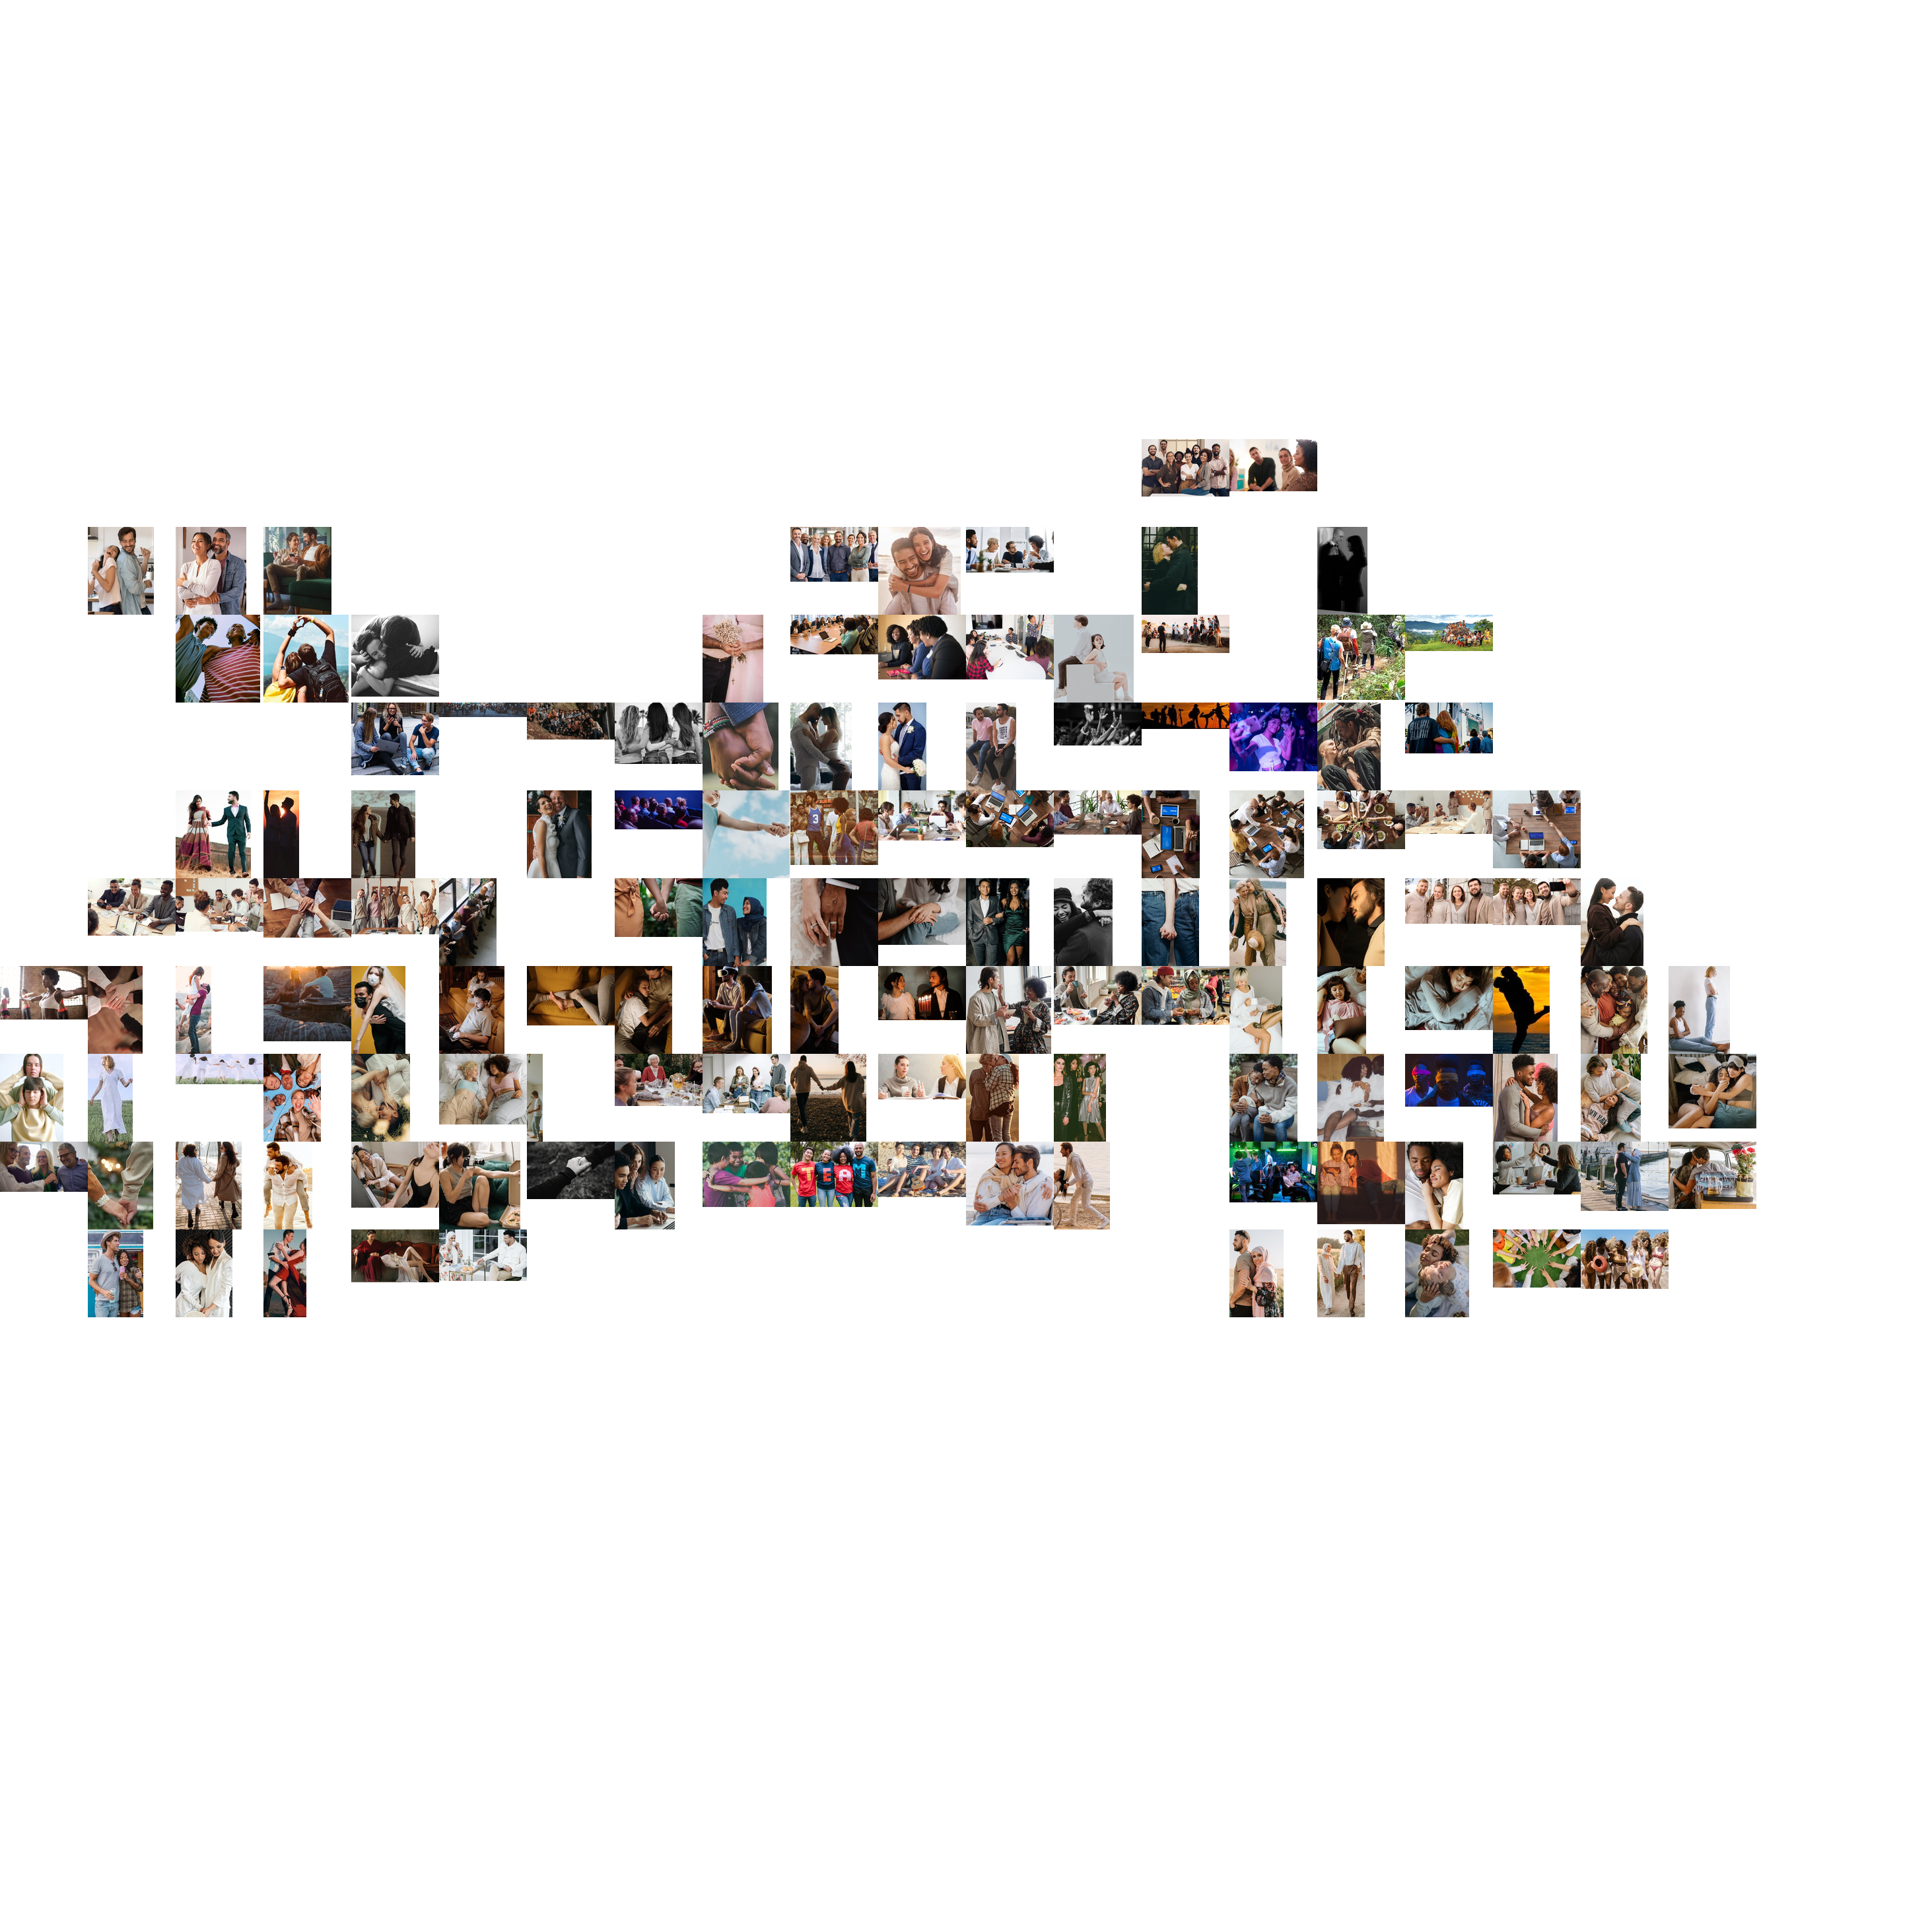

In [9]:
from PIL import Image, ImageDraw
import numpy as np
import random
import math
import os

def normalize_image_size(image_path, size):
    # Load image from file
    image = Image.open(image_path).convert('RGBA')
    
    # Calculate new size while maintaining aspect ratio
    width, height = image.size
    if width > height:
        new_width = size
        new_height = int(height * size / width)
    else:
        new_height = size
        new_width = int(width * size / height)
    
    # Resize image
    resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)
    
    return resized_image

def higher_square(num):
    root = int(math.sqrt(num))
    return (root + 1) #** 2


# Load the images to be used in the collage
images, img_size = [],[]

for i in os.listdir('Examples5'):
    img = Image.open('Examples5/'+i)
    img_size.append(img.size)

# Normalizing size of images
size = max(min(img_size))

var = [0] # for appending all matrix 
n = len(img_size) # total number of images

# square of (higher square root of (number of images))
length = higher_square(n) +7

for i in range(length):
    i+=1
    var.append(size*i)  #(size//2)  Size is divided by two so that the size could be decreased


result = []
final = []

# Loop through each pair of items in the list
for i in range(len(var)):
    for j in range(len(var)):
        
        # Create a tuple of the pair of items and append it to the result list
        result.append((var[i], var[j]))

result.remove((var[0],var[-1]))
result.remove((var[-1],var[0]))

x1,y1,x2,y2 = 0,0,1,1

    
for w in range(length**2):
    
    # if the loop reaches the divisible number of length
    if x1%length==0 and x1!=0:
        x1 = 0
        x2 = 1
        y1+=1
        y2+=1
        
    final.append(((var[x1],var[y1]),(var[x2],var[y2])))
    x1+=1
    x2+=1


# Define the dimensions of the final collage
canvas_width = size*(len(var)+1)
canvas_height = size*(len(var)+1)

# Create a new image to use as the canvas
canvas = Image.new('RGBA', (canvas_width, canvas_height), (255, 0, 0, 0))

    
# Shape Part

im = Image.open('bike.jpg') #icon/vertical.png
width, height = im.size   # Get dimensions

if width > height:
    # Take difference, split it into two
    ext = (width-height)//2
    left = ext
    top = 0
    right = height+ext
    bottom = height

    # Crop the center of the image
    im = im.crop((left,top, right, bottom)) #(38, 0, 537+38, 537)

if width < height:
    # Take difference, split it into two
    ext = (height-width)//2
    top = ext
    left = 0
    bottom = width+ext
    right = width

    # Crop the center of the image
    im = im.crop((left,top, right, bottom))

# Resize
im = im.resize((length,length))
# Grayscale
im = im.convert('L')
# Threshold
im = im.point( lambda p: 255 if p > 100 else 0 )
im = np.array(im)
# iterate through the sublist using List comprehension
shapes = [element for innerList in im for element in innerList]
shapes


for i in os.listdir('Examples5'):
    img = normalize_image_size('Examples5/'+i, size)
    images.append(img)


# Main Automation
# Paste the images onto the canvas
j = 0

while(True):
    for i in range(len(final)):
        if shapes[i] == 0:
            #im1 = images[j].rotate(23, Image.NEAREST, expand = 1, fillcolor = (255, 0, 0, 0))
            canvas.paste(images[j], final[i][0])
            j+=1
        else:
            i+=1
    
    if i == len(final) or j == len(shapes):
        break

# Save the collage
canvas.save('xyz3.png')
canvas

In [65]:
df = 0
for asd in range(len(shapes)):
    if 0 in shapes:
        df+=1
df

169

In [66]:
len(images)

151

In [4]:
wwt = []
hht = []
for r in images:
    wwt.append(r.size[0])
    hht.append(r.size[1])
    
print(max(wwt),max(hht))

133 133


In [6]:
max(min(img_size))

133

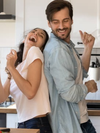

In [10]:
im1 = Image.open(r'picnic 50\4bcafc9b05fd9eeef80fc8bcbbf7391f52807321.jpg')

# im1 = im1.rotate(23, Image.NEAREST, expand = 1, fillcolor = "white")
images[2]#.crop((left,top, right, bottom))

In [4]:
from PIL import Image
import numpy as np

im = Image.open('bike.jpg')
# Grayscale
im = im.convert('L')
# Threshold
im = im.point( lambda p: 255 if p > 100 else 0 )
im = np.array(im)
im
# im[np.where((im==[0,0,0]).all(axis=2))]=[0,0,255]
# cv2.imshow('im',im)
# cv2.waitKey(0)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# Setting the MATIX one-on-one

In [24]:
import cv2

im = cv2.imread('bike.jpg', cv2.IMREAD_GRAYSCALE)
ret,thresh = cv2.threshold(im,127,255,cv2.THRESH_BINARY_INV)
thresh[np.where((thresh==[255,255,255]).all(axis=2))] = [255,0,0]
cv2.imshow('sdfs',thresh)
cv2.waitKey(0)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5176\1602938991.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  thresh[np.where((thresh!=[255,255,255]))] = [255,0,0]


ValueError: shape mismatch: value array of shape (3,) could not be broadcast to indexing result of shape (1,820)

# Shape image to Black&White

In [51]:
import cv2
import numpy as np
import time

# cv2.namedWindow('window')

im = cv2.imread('bike.jpg', cv2.COLOR_RGB2RGBA)
ret,img = cv2.threshold(im,127,255,cv2.THRESH_BINARY_INV)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGRA)

img[np.where((img==[255,255,255,255]).all(axis=2))] = [0,0,255,0]
img[np.where((img==[0,0,0,255]).all(axis=2))] = [255,255,255,255]

cv2.imwrite('window2.png', img)

# cv2.waitKey(1)
# cv2.destroyAllWindows()

True

In [85]:
import matplotlib.image as mpimg
import numpy as np
import cv2
# im1 = Image.open(r'C:\Users\Dell\Downloads\H2 correct.png').convert('RGBA')
# img = Image.fromarray(img)

# width, height = img.size
im1 = mpimg.imread('xyz3.png')
# im1 = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
# img = cv2.imread('window.png', cv2.IMREAD_UNCHANGED)
img = mpimg.imread('window.png')
sz = im1.shape
img = cv2.resize(img, (sz[0],sz[1]))
# im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2BGRA)

# xy = Image.blend(img,img, 0.5)
# im1 = cv2.addWeighted(img, 1, im1, 1, 1)
out = np.concatenate([img,im1])
cv2.imshow('sadf.png',out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [84]:
img.shape, im1.shape

((1197, 1197, 4), (1197, 1197, 4))

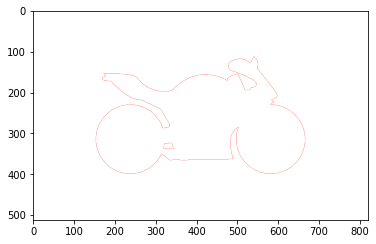

In [75]:
import matplotlib.image as mpimg


img2=mpimg.imread('window.png')
plt.imshow(img2)

In [65]:
img.shape, im1.shape

((1197, 1197, 4), (1197, 1197, 4))

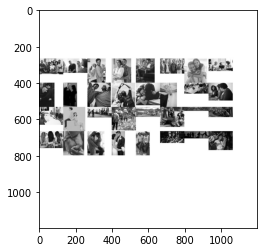

In [67]:
plt.imshow(im1)

### https://www.geeksforgeeks.org/how-to-merge-a-transparent-png-image-with-another-image-using-pil/

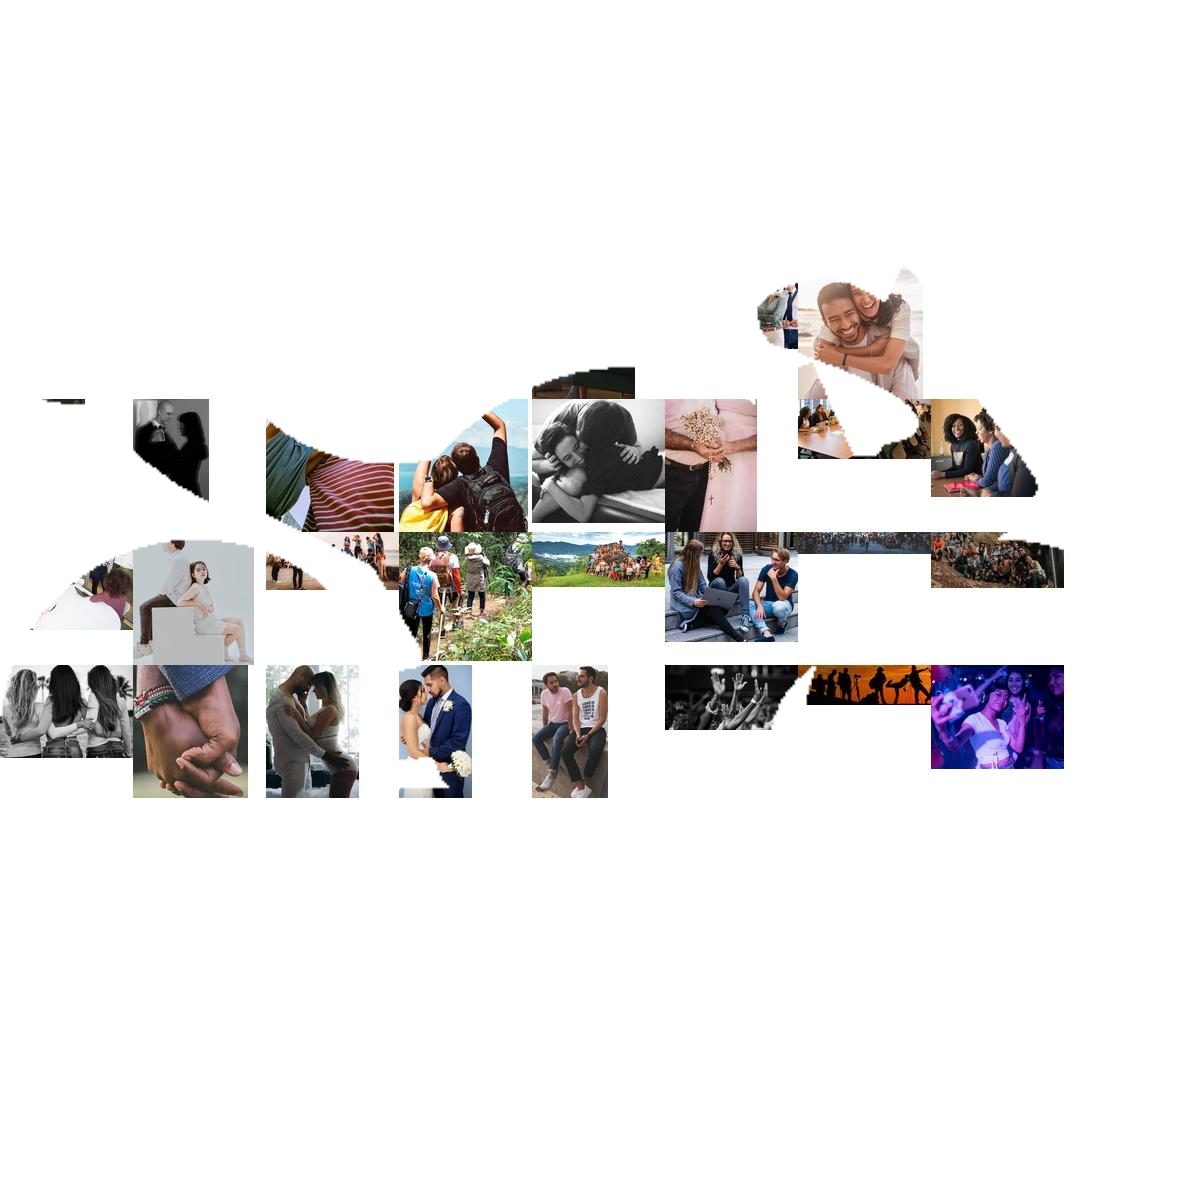

In [97]:
# import PIL module
from PIL import Image

# Front Image
filename = 'window.png'

# Back Image
filename1 = 'rectangle.jpg'

# Open Front Image
frontImage = Image.open(filename)

# Open Background Image
background = Image.open(filename1)

# Convert image to RGBA
frontImage = frontImage.convert("RGBA")

# Convert image to RGBA
background = background.convert("RGBA")

# Calculate width to be at the center
width = (background.width - frontImage.width) // 2

# Calculate height to be at the center
height = (background.width - frontImage.height) // 2


if frontImage.width > frontImage.height:
    # Take difference, split it into two
    ext = (frontImage.width-frontImage.height)//2
    left = ext
    top = 0
    right = frontImage.height+ext
    bottom = frontImage.height

    # Crop the center of the image
    frontImage = frontImage.crop((left,top, right, bottom)) #(38, 0, 537+38, 537)

if frontImage.width < frontImage.height:
    # Take difference, split it into two
    ext = (frontImage.height-frontImage.width)//2
    top = ext
    left = 0
    bottom = frontImage.width+ext
    right = frontImage.width

    # Crop the center of the image
    frontImage = frontImage.crop((left,top, right, bottom))
frontImage = frontImage.resize((background.width,background.width))

# Paste the frontImage at (width, height)
background.paste(frontImage, (0, 0), frontImage)

# Save this image
background#.save("new.png", format="png")
